# Machine learning Weather prediction model

In [3]:
import pandas as pd
import matplotlib as mlt
weather = pd.read_csv("syd_weather.csv", index_col="DATE")

In [4]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1970-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",2.3,NaN,25.4,18.4
1970-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",4.1,NaN,28.1,18.7
1970-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,NaN,24.8,16.6
1970-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,NaN,27.6,16.8
1970-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,NaN,27.3,15.7
...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,NaN,NaN,NaN
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,NaN,NaN,NaN
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,NaN,NaN,NaN


# checking which columns contain the most missing values

In [5]:
null_percentage = weather.apply(pd.isnull).sum()/weather.shape[0]
null_percentage

STATION    0.000000
NAME       0.000000
PRCP       0.000413
TAVG       0.062016
TMAX       0.000568
TMIN       0.000981
dtype: float64

checking which columns contain a good amount of data


In [6]:
valid_columns = weather.columns[null_percentage < 0.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [7]:
weather = weather[valid_columns].copy()

using forward fill to fill in the missing values (for example data seems to be missing for 2023)

In [8]:
weather = weather.ffill()
null_percentage = weather.apply(pd.isnull).sum()/weather.shape[0]
null_percentage

STATION    0.0
NAME       0.0
PRCP       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

making sure that columns contain the correct data types

In [9]:
weather.dtypes

STATION     object
NAME        object
PRCP       float64
TMAX       float64
TMIN       float64
dtype: object

In [10]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
       '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
      dtype='object', name='DATE', length=19366)

need to change the date column to a datetime object

In [11]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
               '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-07', '2023-01-08'],
              dtype='datetime64[ns]', name='DATE', length=19366, freq=None)

In [12]:
weather.index.year

Int64Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
            ...
            2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=19366)

making sure we dont have gaps in our data (i.e. missing years)

In [13]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023      8
Name: DATE, dtype: int64

<AxesSubplot: xlabel='DATE'>

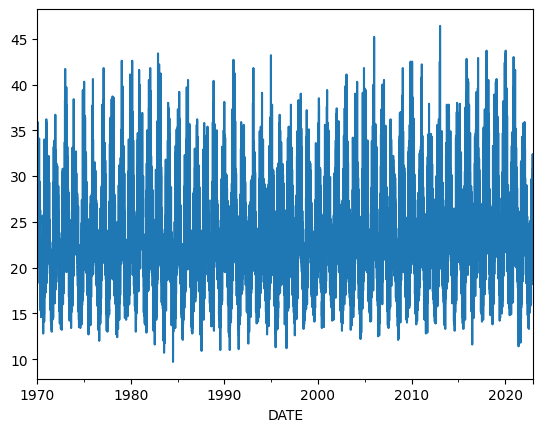

In [14]:
weather["TMAX"].plot()

<AxesSubplot: xlabel='DATE'>

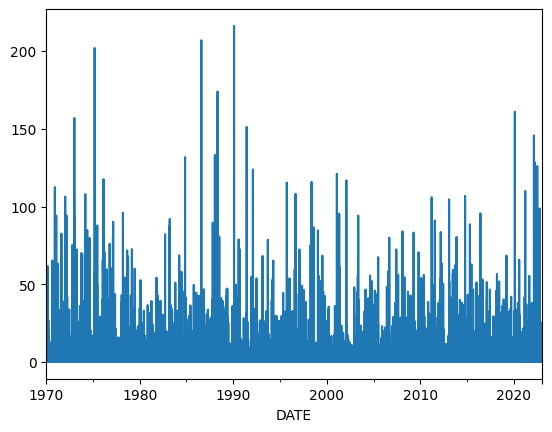

In [15]:
weather["PRCP"].plot()

In [16]:
weather

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1970-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",2.3,25.4,18.4
1970-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",4.1,28.1,18.7
1970-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,24.8,16.6
1970-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.6,16.8
1970-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.3,15.7
...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.1,17.9


to be able to predict into the future we need to shift all the values back by one day so that we can add a new column for our target prediction

In [17]:
weather["target"] = weather.shift(-1)["TMAX"]
weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
1970-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",2.3,25.4,18.4,28.1
1970-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",4.1,28.1,18.7,24.8
1970-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,24.8,16.6,27.6
1970-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.6,16.8,27.3
1970-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.3,15.7,22.8
...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.1,17.9,27.1


In [18]:
weather = weather.ffill()
weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
1970-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",2.3,25.4,18.4,28.1
1970-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",4.1,28.1,18.7,24.8
1970-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,24.8,16.6,27.6
1970-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.6,16.8,27.3
1970-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.3,15.7,22.8
...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.1,17.9,27.1


In [19]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)

In [20]:
predictors = weather.columns[~weather.columns.isin(["target", "NAME", "STATION"])]
predictors

Index(['PRCP', 'TMAX', 'TMIN'], dtype='object')

Time series data --> use back testing or time seres cross validation to account for the time series nature of the data

In [21]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions) 

In [22]:
predictions = backtest(weather, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,27.8,26.813427,0.986573
1979-12-31,25.1,27.024292,1.924292
1980-01-01,20.5,26.045843,5.545843
1980-01-02,25.1,22.779061,2.320939
1980-01-03,28.5,25.018782,3.481218
...,...,...,...
2023-01-04,27.1,25.984081,1.115919
2023-01-05,27.1,25.984081,1.115919
2023-01-06,27.1,25.980294,1.119706


using mean absolute error to calculate the error of our model

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.581062765979283

We can see that our model is currently 2.5 degrees off on average

Now we will work on generating new predictors to improve the accuracy of our model. An example of how we can improve this model is by using the average precipitation for the past 7 days as a predictor. (Using a rolling mean)

In [24]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col]) 
    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP"]:
        weather = compute_rolling(weather, horizon, col)

weather

,STATION,NAME,PRCP,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,
1970-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",2.3,25.4,18.4,28.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",4.1,28.1,18.7,24.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,24.8,16.6,27.6,26.100000,-0.049808,17.900000,-0.072626,2.133333,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.6,16.8,27.3,26.833333,0.028571,17.366667,-0.032630,1.366667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.3,15.7,22.8,26.566667,0.027604,16.366667,-0.040733,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000,0.366667,-1.0,27.535714,-0.015824,18.285714,-0.021094,1.771429,-1.000000
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000,0.100000,-1.0,27.735714,-0.022920,18.414286,-0.027929,1.757143,-1.000000
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000,0.100000,2.0,27.500000,-0.014545,18.500000,-0.032432,1.735714,-0.827160


Cleaning data (removing the first 14 rows since not helpful for rolling avg)

In [28]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)
weather

,STATION,NAME,PRCP,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct
DATE,,,,,,,,,,,,,,,,,,
1970-02-12,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,28.8,20.9,24.6,28.833333,-0.001156,20.900000,-1.699863e-16,0.000000,0.0,27.607143,0.043208,19.464286,0.073761,0.635714,-1.000000
1970-02-13,ASN00066037,"SYDNEY AIRPORT AMO, AS",1.0,24.6,18.9,27.1,27.400000,-0.102190,20.266667,-6.743421e-02,0.333333,2.0,27.585714,-0.108234,19.335714,-0.022534,0.707143,0.414141
1970-02-14,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,16.4,28.2,26.833333,0.009938,18.733333,-1.245552e-01,0.333333,-1.0,27.614286,-0.018624,19.100000,-0.141361,0.564286,-1.000000
1970-02-15,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,28.2,21.0,27.2,26.633333,0.058824,18.766667,1.190053e-01,0.333333,-1.0,27.850000,0.012567,19.464286,0.078899,0.564286,-1.000000
1970-02-16,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.2,17.6,24.0,27.500000,-0.010909,18.333333,-4.000000e-02,0.100000,2.0,28.121429,-0.032766,19.392857,-0.092449,0.242857,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000e+00,0.366667,-1.0,27.535714,-0.015824,18.285714,-0.021094,1.771429,-1.000000
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000e+00,0.100000,-1.0,27.735714,-0.022920,18.414286,-0.027929,1.757143,-1.000000
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000e+00,0.100000,2.0,27.500000,-0.014545,18.500000,-0.032432,1.735714,-0.827160


In [29]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["TMAX", "TMIN", "PRCP"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

weather

,STATION,NAME,PRCP,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1970-02-12,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,28.8,20.9,24.6,28.833333,-0.001156,20.900000,-1.699863e-16,...,19.464286,0.073761,0.635714,-1.000000,28.800000,28.800000,20.900000,20.900000,0.000000,0.000000
1970-02-13,ASN00066037,"SYDNEY AIRPORT AMO, AS",1.0,24.6,18.9,27.1,27.400000,-0.102190,20.266667,-6.743421e-02,...,19.335714,-0.022534,0.707143,0.414141,26.700000,24.600000,19.900000,18.900000,0.500000,1.000000
1970-02-14,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,16.4,28.2,26.833333,0.009938,18.733333,-1.245552e-01,...,19.100000,-0.141361,0.564286,-1.000000,26.833333,27.100000,18.733333,16.400000,0.333333,0.000000
1970-02-15,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,28.2,21.0,27.2,26.633333,0.058824,18.766667,1.190053e-01,...,19.464286,0.078899,0.564286,-1.000000,27.175000,28.200000,19.300000,21.000000,0.250000,0.000000
1970-02-16,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.2,17.6,24.0,27.500000,-0.010909,18.333333,-4.000000e-02,...,19.392857,-0.092449,0.242857,0.235294,27.180000,27.200000,18.960000,17.600000,0.260000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000e+00,...,18.285714,-0.021094,1.771429,-1.000000,27.224691,26.894340,19.560705,19.211321,3.265718,2.432075
2023-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000e+00,...,18.414286,-0.027929,1.757143,-1.000000,27.224613,26.667925,19.559678,19.235849,3.263698,2.833962
2023-01-06,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.3,27.1,17.9,27.1,27.100000,0.000000,17.900000,0.000000e+00,...,18.500000,-0.032432,1.735714,-0.827160,27.224536,26.739623,19.558653,19.201887,3.261867,4.030189


In [30]:
predictors = weather.columns[~weather.columns.isin(["target", "NAME", "STATION"])]
predictors

Index(['PRCP', 'TMAX', 'TMIN', 'rolling_3_TMAX', 'rolling_3_TMAX_pct',
       'rolling_3_TMIN', 'rolling_3_TMIN_pct', 'rolling_3_PRCP',
       'rolling_3_PRCP_pct', 'rolling_14_TMAX', 'rolling_14_TMAX_pct',
       'rolling_14_TMIN', 'rolling_14_TMIN_pct', 'rolling_14_PRCP',
       'rolling_14_PRCP_pct', 'month_avg_TMAX', 'day_avg_TMAX',
       'month_avg_TMIN', 'day_avg_TMIN', 'month_avg_PRCP', 'day_avg_PRCP'],
      dtype='object')

In [33]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.4252158099022756

YAY!! Decrease to 2.43 degrees error now.

In [34]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2013-01-17,46.4,28.417785,17.982215
1982-11-24,43.4,26.753858,16.646142
2009-11-21,42.5,26.027452,16.472548
1994-12-20,43.2,26.829265,16.370735
2005-12-31,45.2,29.102820,16.097180
...,...,...,...
2020-02-04,27.6,27.602559,0.002559
1986-02-06,26.8,26.799146,0.000854
1997-05-23,18.0,17.999512,0.000488


In [35]:
weather.loc["2013-01-10":"2013-01-22"]

,STATION,NAME,PRCP,TMAX,TMIN,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-10,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,26.1,19.7,31.9,30.700000,-0.149837,20.233333,-0.026359,...,19.592857,0.005468,0.000000,0.000000,26.900000,26.937209,19.384832,19.120930,3.302668,1.865116
2013-01-11,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,31.9,20.5,31.4,27.166667,0.174233,20.133333,0.018212,...,19.778571,0.036475,0.000000,0.000000,26.903808,27.186047,19.385682,19.188372,3.300152,1.437209
2013-01-12,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,31.4,22.9,23.9,29.800000,0.053691,21.033333,0.088748,...,20.100000,0.139303,0.000000,0.000000,26.907230,26.841860,19.388356,19.393023,3.297641,1.213953
2013-01-13,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,23.9,20.2,22.1,29.066667,-0.177752,21.200000,-0.047170,...,20.228571,-0.001412,0.000000,0.000000,26.904943,26.018605,19.388973,19.360465,3.295133,2.488372
2013-01-14,ASN00066037,"SYDNEY AIRPORT AMO, AS",9.2,22.1,17.3,25.4,25.800000,-0.143411,20.133333,-0.140728,...,20.142857,-0.141135,0.657143,13.000000,26.901292,26.574419,19.387386,18.851163,3.299620,3.146512
2013-01-15,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,25.4,18.1,28.5,23.800000,0.067227,18.533333,-0.023381,...,19.992857,-0.094677,0.657143,-1.000000,26.900152,27.516279,19.386409,19.406977,3.297115,2.923256
2013-01-16,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,28.5,18.5,30.1,25.333333,0.125000,17.966667,0.029685,...,19.871429,-0.069015,0.657143,-1.000000,26.901366,26.648837,19.385736,19.706977,3.294613,2.883721
2013-01-17,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,30.1,21.1,46.4,28.000000,0.075000,19.233333,0.097054,...,20.114286,0.049006,0.657143,-1.000000,26.903791,26.318605,19.387036,19.451163,3.292115,8.390698
2013-01-18,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.0,46.4,22.7,23.4,35.000000,0.325714,20.766667,0.093098,...,20.357143,0.115088,0.657143,-1.000000,26.918561,26.827907,19.389545,19.211628,3.289621,2.655814


<AxesSubplot: >

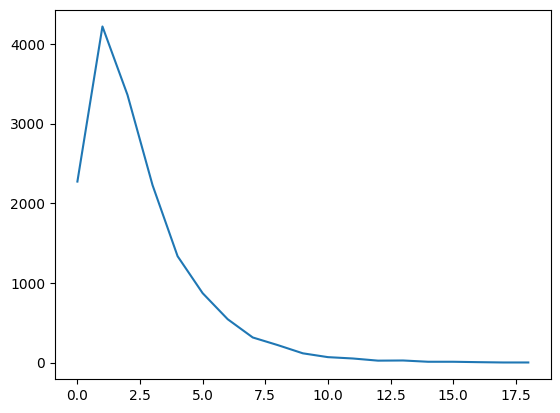

In [38]:
(predictions["diff"].round().value_counts()).sort_index().plot()

Consider more predictor columsn. For example, we can use the average temperature for the past 7 days as a predictor. (Using a rolling mean). Consider ratio between average monthly and daily temperature. COnsider average precipitation + rolling averages... Maybe investigate the columsn with null values. Maybe using another model like xgboost or random forest will improve the accuracy of our model.